<a href="https://colab.research.google.com/github/WCosmo/DL-Team-Project-1/blob/main/Santander_kaggle_challenger_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Load the dataset

Upload the API token:

In [1]:
from google.colab import files


In [ ]:
files.upload() #upload kaggle.json

Download the Dataset:

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
import kaggle

In [7]:
!kaggle competitions download -c santander-customer-satisfaction

100% 8.25M/8.25M [00:00<00:00, 73.6MB/s]
100% 8.25M/8.25M [00:00<00:00, 73.4MB/s]


Install the Dataset:

In [8]:
!unzip -q santander-customer-satisfaction.zip 


Load the Dataset as Pandas:

In [9]:
import pandas as pd
customer_data = pd.read_csv("train.csv")
customer_data_test = pd.read_csv("test.csv")

In [10]:
customer_data.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [149]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


#2. Data preprocessing

Correlation matrix calculation:

In [12]:
customer_data_corr = customer_data.corr()

In [13]:
idx = customer_data_corr.index[customer_data_corr['TARGET']>=0.01]

In [14]:
customer_data[idx]

,var15,imp_op_var39_comer_ult1,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var41_comer_ult1,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,...,num_med_var22_ult3,num_meses_var8_ult3,num_op_var40_efect_ult1,num_op_var40_efect_ult3,num_op_var41_efect_ult1,num_op_var41_efect_ult3,num_op_var39_efect_ult1,num_op_var39_efect_ult3,num_reemb_var17_ult1,TARGET
0,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,37,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
76016,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6,0,0,0,0,0,0,0,0,0
76017,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
76018,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


Test dataset:

In [147]:
t_idx = idx.drop(['TARGET'])


In [148]:
customer_data_test[t_idx]

,var15,imp_op_var39_comer_ult1,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var41_comer_ult1,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,...,num_var22_ult3,num_med_var22_ult3,num_meses_var8_ult3,num_op_var40_efect_ult1,num_op_var40_efect_ult3,num_op_var41_efect_ult1,num_op_var41_efect_ult3,num_op_var39_efect_ult1,num_op_var39_efect_ult3,num_reemb_var17_ult1
0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,0,0,0,0,0,0,0,0,0
1,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,0,0,0,0,0,0,0,0,0
2,23,0.0,0.0,0.0,0.0,60.0,60.0,60.0,60.0,60.0,...,0,0,0,0,0,3,3,3,3,0
3,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75813,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
75814,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
75815,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
75816,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
X_dtest = customer_data_test[t_idx].values[:,0:42]

In [186]:
tid = customer_data_test['ID'].to_numpy() 


Function to save the results:

In [188]:
import csv

def create_otp(result, name='result.csv'):
  header = ['ID', 'TARGET']

  rm = result[:, 0]

  with open(name, 'w') as file:
    writer = csv.writer(file)    
    writer.writerow(header)

    for i in range(rm.shape[0]):      
      l = str(tid[i]) + '-' + str(rm[i])
      entries = l.split('-')         
      writer.writerow(entries)


Definition of the split function:

In [189]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
np.random.seed(42)

In [190]:
train_set, test_set = split_train_test(customer_data[idx], 0.2)

In [191]:
X_train = train_set.values[:,0:42]
X_validation  = test_set.values[:,0:42]

In [192]:
y_train = train_set.values[:,43]
y_validation  = test_set.values[:,43]

In [193]:
from collections import Counter
print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_validation)}")

Training target statistics: Counter({0.0: 58415, 1.0: 2401})
Testing target statistics: Counter({0.0: 14597, 1.0: 607})


#3. ANN Model

In [194]:
import tensorflow as tf
from tensorflow import keras

Definiton of the model:

In [156]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[42]))

#1st fully connected Neural Network hidden-layer
model.add(keras.layers.Dense(160))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Activation('sigmoid'))

#2nd fully connected Neural Network hidden-layer
model.add(keras.layers.Dense(40))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Activation('relu'))

#Output layer
model.add(keras.layers.Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 42)                0         
                                                                 
 dense_6 (Dense)             (None, 160)               6880      
                                                                 
 dropout_4 (Dropout)         (None, 160)               0         
                                                                 
 activation_4 (Activation)   (None, 160)               0         
                                                                 
 dense_7 (Dense)             (None, 40)                6440      
                                                                 
 dropout_5 (Dropout)         (None, 40)                0         
                                                                 
 activation_5 (Activation)   (None, 40)               

Optimizer:

In [157]:
sgd = keras.optimizers.SGD(learning_rate=0.05, decay=1e-6, momentum=0.9, nesterov="True") 

Compilation of the model:

In [158]:
model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])
epch = 20

#4. Unbalanced test

Training of the model with unbalanced dataset:

In [195]:
history = model.fit(X_train, y_train, epochs=epch, validation_data=(X_validation, y_validation))

Epoch 1/20
1901/1901 [==============================] - 5s 2ms/step - loss: 0.1549 - accuracy: 0.9591 - val_loss: 0.1525 - val_accuracy: 0.9601
Epoch 2/20
1901/1901 [==============================] - 4s 2ms/step - loss: 0.1485 - accuracy: 0.9605 - val_loss: 0.1518 - val_accuracy: 0.9601
Epoch 3/20
1901/1901 [==============================] - 4s 2ms/step - loss: 0.1488 - accuracy: 0.9605 - val_loss: 0.1504 - val_accuracy: 0.9601
Epoch 4/20
1901/1901 [==============================] - 4s 2ms/step - loss: 0.1482 - accuracy: 0.9605 - val_loss: 0.1503 - val_accuracy: 0.9601
Epoch 5/20
1901/1901 [==============================] - 4s 2ms/step - loss: 0.1485 - accuracy: 0.9605 - val_loss: 0.1497 - val_accuracy: 0.9601
Epoch 6/20
1901/1901 [==============================] - 4s 2ms/step - loss: 0.1477 - accuracy: 0.9605 - val_loss: 0.1521 - val_accuracy: 0.9601
Epoch 7/20
1901/1901 [==============================] - 4s 2ms/step - loss: 0.1472 - accuracy: 0.9605 - val_loss: 0.1494 - val_accuracy:

In [196]:
y_proba = model.predict(X_validation)

In [197]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import seaborn as sns

In [198]:
fpr, tpr, thresholds = roc_curve(y_validation,y_proba)

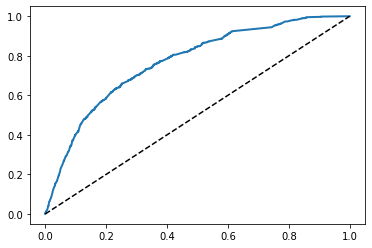

In [199]:
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal

plot_roc_curve(fpr, tpr)
plt.show()

In [200]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_validation, y_proba)

0.768081816816188

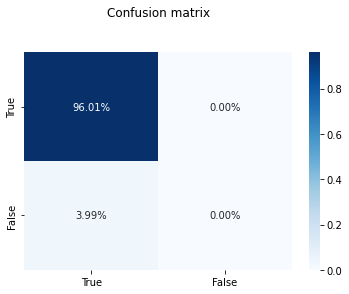

In [201]:
cf = confusion_matrix(y_validation, np.round(y_proba))
ax = plt.subplots()
ax = sns.heatmap(cf/np.sum(cf), annot=True, fmt='.2%', cmap='Blues')
ax.set_title('Confusion matrix\n\n');
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])
plt.show()

Results of model with unbalanced dataset:

In [202]:
RM1 = model.predict(X_dtest)
create_otp(RM1, name='Santander_Customer_Satisfaction_unbalanced.csv')

#5. Oversampled Test

Training of the model with Oversampler:

In [203]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_validation)}")

Training target statistics: Counter({0.0: 58415, 1.0: 58415})
Testing target statistics: Counter({0.0: 14597, 1.0: 607})


In [204]:
history = model.fit(X_res, y_res, epochs=epch, validation_data=(X_validation, y_validation))

Epoch 1/20
3651/3651 [==============================] - 8s 2ms/step - loss: 0.5732 - accuracy: 0.7074 - val_loss: 0.5934 - val_accuracy: 0.7435
Epoch 2/20
3651/3651 [==============================] - 8s 2ms/step - loss: 0.5650 - accuracy: 0.7154 - val_loss: 0.5395 - val_accuracy: 0.7597
Epoch 3/20
3651/3651 [==============================] - 8s 2ms/step - loss: 0.5637 - accuracy: 0.7167 - val_loss: 0.5283 - val_accuracy: 0.7723
Epoch 4/20
3651/3651 [==============================] - 9s 2ms/step - loss: 0.5638 - accuracy: 0.7166 - val_loss: 0.5639 - val_accuracy: 0.7478
Epoch 5/20
3651/3651 [==============================] - 8s 2ms/step - loss: 0.5641 - accuracy: 0.7157 - val_loss: 0.5579 - val_accuracy: 0.7657
Epoch 6/20
3651/3651 [==============================] - 8s 2ms/step - loss: 0.5630 - accuracy: 0.7178 - val_loss: 0.5565 - val_accuracy: 0.7537
Epoch 7/20
3651/3651 [==============================] - 8s 2ms/step - loss: 0.5638 - accuracy: 0.7166 - val_loss: 0.5422 - val_accuracy:

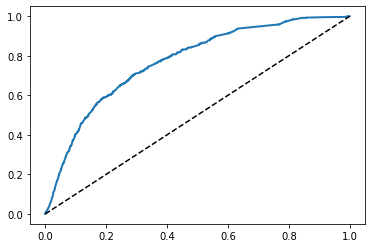

In [205]:
y_proba = model.predict(X_validation)
fpr, tpr, thresholds = roc_curve(y_validation,y_proba)
plot_roc_curve(fpr, tpr)
plt.show()

In [206]:
roc_auc_score(y_validation, y_proba)

0.7716925540092586

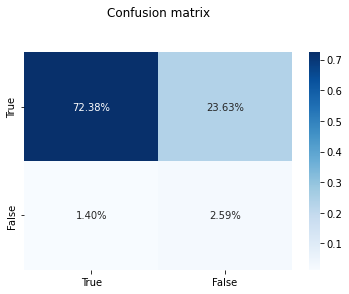

In [207]:
cf = confusion_matrix(y_validation, np.round(y_proba))
ax = plt.subplots()
ax = sns.heatmap(cf/np.sum(cf), annot=True, fmt='.2%', cmap='Blues')
ax.set_title('Confusion matrix\n\n');
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])
plt.show()

In [208]:
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_validation)}")

Training target statistics: Counter({0.0: 58415, 1.0: 58415})
Testing target statistics: Counter({0.0: 14597, 1.0: 607})


Results of the model with Oversampler:

In [209]:
RM2 = model.predict(X_dtest) 
create_otp(RM2, name='Santander_Customer_Satisfaction_oversampled.csv')

#6. Undersampled Test

Training of the model with Undersampler:

In [210]:
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(random_state=42)
X_res, y_res = under_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_validation)}")

Training target statistics: Counter({0.0: 2401, 1.0: 2401})
Testing target statistics: Counter({0.0: 14597, 1.0: 607})


In [211]:
history = model.fit(X_res, y_res, epochs=epch, validation_data=(X_validation, y_validation))

Epoch 1/20
151/151 [==============================] - 1s 6ms/step - loss: 0.5574 - accuracy: 0.7234 - val_loss: 0.5866 - val_accuracy: 0.7281
Epoch 2/20
151/151 [==============================] - 1s 6ms/step - loss: 0.5533 - accuracy: 0.7276 - val_loss: 0.5467 - val_accuracy: 0.7396
Epoch 3/20
151/151 [==============================] - 1s 6ms/step - loss: 0.5517 - accuracy: 0.7253 - val_loss: 0.5416 - val_accuracy: 0.7522
Epoch 4/20
151/151 [==============================] - 1s 6ms/step - loss: 0.5568 - accuracy: 0.7266 - val_loss: 0.5352 - val_accuracy: 0.7669
Epoch 5/20
151/151 [==============================] - 1s 6ms/step - loss: 0.5555 - accuracy: 0.7284 - val_loss: 0.6770 - val_accuracy: 0.6108
Epoch 6/20
151/151 [==============================] - 1s 6ms/step - loss: 0.5556 - accuracy: 0.7239 - val_loss: 0.7030 - val_accuracy: 0.7201
Epoch 7/20
151/151 [==============================] - 1s 6ms/step - loss: 0.5649 - accuracy: 0.7276 - val_loss: 0.7337 - val_accuracy: 0.5495
Epoch 

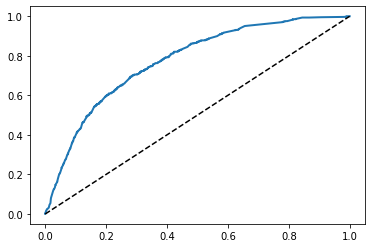

In [212]:
y_proba = model.predict(X_validation)
fpr, tpr, thresholds = roc_curve(y_validation,y_proba)
plot_roc_curve(fpr, tpr)
plt.show()

In [213]:
roc_auc_score(y_validation, y_proba)

0.7743330731112066

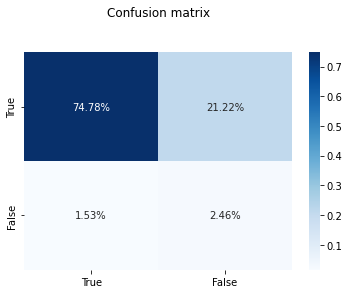

In [214]:
cf = confusion_matrix(y_validation, np.round(y_proba))
ax = plt.subplots()
ax = sns.heatmap(cf/np.sum(cf), annot=True, fmt='.2%', cmap='Blues')
ax.set_title('Confusion matrix\n\n');
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])
plt.show()

In [215]:
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_validation)}")

Training target statistics: Counter({0.0: 2401, 1.0: 2401})
Testing target statistics: Counter({0.0: 14597, 1.0: 607})


Results of the model with Undersampler:

In [216]:
RM3 = model.predict(X_dtest) 
create_otp(RM3,name='Santander_Customer_Satisfaction_undersampled.csv')